In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import PlottingTools as RPlot
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes import param
from data_analysis_codes.tools import Cstyle
from data_analysis_codes.tools import LinData
plt.style.use(Cstyle.style1)
import time
from matplotlib import gridspec

In [2]:
def interpolate(f):
    f_save = [f[0]]
    for i in range(len(f)-1):
        f_save += [np.average([f[i], f[i+1]]), f[i+1]]
    return np.array(f_save)

def extrapolate(f):
    return np.append(f, f[-1]+f[-1]-f[-2])

def get_error(f32, f64, f128):
    f32 = interpolate(interpolate(f32))
    f64 = interpolate(f64)
    while len(f32)<len(f128):
        f32 = extrapolate(f32)
    while len(f64)<len(f128):
        f64 = extrapolate(f64)
    c = abs(f32-f64)/abs(f64-f128)
    err = abs((f64-f128)/(c-1))
    for ic in range(len(c)):
        if err[ic]>abs(f32[ic]-f64[ic]) or err[ic]>abs(f64[ic]-f128[ic]):
            err[ic] = np.max([abs(f32[ic]-f64[ic]), abs(f64[ic]-f128[ic])])
    return err

In [3]:
p128 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM')
Lin128 = LinData.LinData_Class(p128)
strvar, var_all128 = RPlot.get_slice_iterations(p128)
var_all128 = np.delete(var_all128, 1)
f128 = [RPlot.get_slice_data(p128, strvar, v) for v in var_all128]
x128 = np.arange(-p128['Lx']/2, p128['Lx']/2, p128['dx'])*np.sqrt(3)
var_all128

 read time file


array([ 1.  , 35.26, 40.  , 45.  , 47.52, 48.01, 49.  , 49.97, 51.02,
       51.97, 53.  , 54.02, 55.03, 55.87])

In [4]:
p64 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM')
Lin64 = LinData.LinData_Class(p64)
strvar, var_all64 = RPlot.get_slice_iterations(p64)
f64 = [RPlot.get_slice_data(p64, strvar, v) for v in var_all64]
x64 = np.arange(-p128['Lx']/2, p128['Lx']/2, p64['dx'])*np.sqrt(3)
var_all64

 read time file


array([ 1.  , 35.26, 39.91, 45.  , 47.52, 48.01, 49.  , 49.97, 50.94,
       52.05, 53.  , 53.94, 55.03, 55.8 ])

In [5]:
p32 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM')
Lin32 = LinData.LinData_Class(p32)
strvar, var_all32 = RPlot.get_slice_iterations(p32)
f32 = [RPlot.get_slice_data(p32, strvar, v) for v in var_all32]
x32 = np.arange(-p128['Lx']/2, p128['Lx']/2, p32['dx'])*np.sqrt(3)
var_all32

 read time file


array([ 1.  , 35.26, 40.09, 45.  , 47.35, 48.01, 49.  , 49.97, 50.94,
       51.89, 52.84, 54.1 , 55.03, 55.64])

$\dot{\Theta}+\frac{1}{3}\Theta^2+2\sigma^2+\frac{\kappa\rho}{2}-\Lambda=0$

$-\dot{K}+\frac{1}{3}K^2+2A^2+\frac{\kappa\rho}{2}-\Lambda=0$

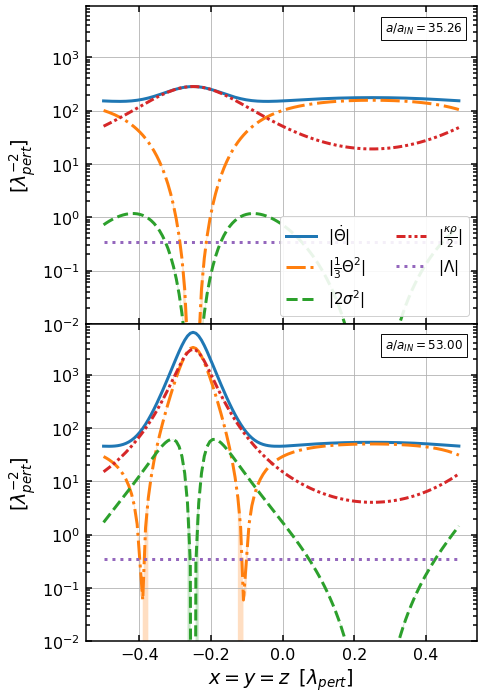

In [48]:
L = p128['Lx']
L2 = L*L

x = x128/(L*np.sqrt(3))

plt.figure(figsize=(7,10))
plt.subplot(211)
it = 1
dtK128 = (((f128[it]['K']**2)/3) + (2*f128[it]['A2'])
          + (Lin128.evo.kappa*f128[it]['rho']/2) - Lin128.evo.Lambda)
dtK64 = (((f64[it]['K']**2)/3) + (2*f64[it]['A2'])
         + (Lin64.evo.kappa*f64[it]['rho']/2) - Lin64.evo.Lambda)
dtK32 = (((f32[it]['K']**2)/3) + (2*f32[it]['A2'])
         + (Lin32.evo.kappa*f32[it]['rho']/2) - Lin32.evo.Lambda)
plt.semilogy(x, abs(dtK128)*L2, linestyle='-', label=r'$|\dot{\Theta}|$')
plt.semilogy(x, abs((1/3)*f128[it]['K']**2)*L2, linestyle='-.', label=r'$|\frac{1}{3}\Theta^2|$')
plt.semilogy(x, abs(2*f128[it]['A2'])*L2, linestyle='--', label=r'$|2\sigma^2|$')
plt.semilogy(x, abs(Lin128.evo.kappa*f128[it]['rho']/2)*L2, linestyle=(0,(3,1,1,1,1,1)), label=r'$|\frac{\kappa\rho}{2}|$')
plt.semilogy(x, [abs(Lin128.evo.Lambda)*L2]*len(x128), linestyle=':', label=r'$|\Lambda|$')

err = get_error(abs(dtK32)*L2, abs(dtK64)*L2, abs(dtK128)*L2)
plt.fill_between(x, abs(dtK128)*L2-err, 
                 abs(dtK128)*L2+err, alpha=0.25)
err = get_error(abs((1/3)*f32[it]['K']**2)*L2, abs((1/3)*f64[it]['K']**2)*L2, abs((1/3)*f128[it]['K']**2)*L2)
plt.fill_between(x, abs((1/3)*f128[it]['K']**2)*L2-err, abs((1/3)*f128[it]['K']**2)*L2+err, alpha=0.25)
err = get_error(abs(2*f32[it]['A2'])*L2, abs(2*f64[it]['A2'])*L2, abs(2*f128[it]['A2'])*L2)
plt.fill_between(x, abs(2*f128[it]['A2'])*L2-err, abs(2*f128[it]['A2'])*L2+err, alpha=0.25)
err = get_error(abs(Lin32.evo.kappa*f32[it]['rho']/2)*L2, abs(Lin64.evo.kappa*f64[it]['rho']/2)*L2, abs(Lin128.evo.kappa*f128[it]['rho']/2)*L2)
plt.fill_between(x, abs(Lin128.evo.kappa*f128[it]['rho']/2)*L2-err, abs(Lin128.evo.kappa*f128[it]['rho']/2)*L2+err, alpha=0.25)
plt.text(0.285, 3e3, r'$a/a_{IN}=$'+'{:.2f}'.format(var_all128[it]), fontsize=12, bbox=dict(facecolor='white', alpha=0.95))
plt.grid()
plt.ylabel(r'$[\lambda_{pert}^{-2}]$')
plt.legend(loc=4, fontsize=15, ncol=2, framealpha=0.9)
plt.gca().set_xticklabels([])
plt.ylim(1e-2, 9e3)
#plt.ylim(L2*2e-10, L2*0.002)

plt.subplot(212)
it = 10
dtK128 = (((f128[it]['K']**2)/3) + (2*f128[it]['A2'])
          + (Lin128.evo.kappa*f128[it]['rho']/2) - Lin128.evo.Lambda)
dtK64 = (((f64[it]['K']**2)/3) + (2*f64[it]['A2'])
         + (Lin64.evo.kappa*f64[it]['rho']/2) - Lin64.evo.Lambda)
dtK32 = (((f32[it]['K']**2)/3) + (2*f32[it]['A2'])
         + (Lin32.evo.kappa*f32[it]['rho']/2) - Lin32.evo.Lambda)
plt.semilogy(x, abs(dtK128)*L2, linestyle='-', label=r'$|\dot{\Theta}|$')
plt.semilogy(x, abs((1/3)*f128[it]['K']**2)*L2, linestyle='-.', label=r'$|\frac{1}{3}\Theta^2|$')
plt.semilogy(x, abs(2*f128[it]['A2'])*L2, linestyle='--', label=r'$|2\sigma^2|$')
plt.semilogy(x, abs(Lin128.evo.kappa*f128[it]['rho']/2)*L2, linestyle=(0,(3,1,1,1,1,1)), label=r'$|\frac{\kappa\rho}{2}|$')
plt.semilogy(x, [abs(Lin128.evo.Lambda)*L2]*len(x128), linestyle=':', label=r'$|\Lambda|$')
err = get_error(abs(dtK32)*L2, abs(dtK64)*L2, abs(dtK128)*L2)
plt.fill_between(x, abs(dtK128)*L2-err, abs(dtK128)*L2+err, alpha=0.25)
err = get_error(abs((1/3)*f32[it]['K']**2)*L2, abs((1/3)*f64[it]['K']**2)*L2, abs((1/3)*f128[it]['K']**2)*L2)
plt.fill_between(x, abs((1/3)*f128[it]['K']**2)*L2-err, abs((1/3)*f128[it]['K']**2)*L2+err, alpha=0.25)
err = get_error(abs(2*f32[it]['A2'])*L2, abs(2*f64[it]['A2'])*L2, abs(2*f128[it]['A2'])*L2)
plt.fill_between(x, abs(2*f128[it]['A2'])*L2-err, abs(2*f128[it]['A2'])*L2+err, alpha=0.25)
err = get_error(abs(Lin32.evo.kappa*f32[it]['rho']/2)*L2, abs(Lin64.evo.kappa*f64[it]['rho']/2)*L2, abs(Lin128.evo.kappa*f128[it]['rho']/2)*L2)
plt.fill_between(x, abs(Lin128.evo.kappa*f128[it]['rho']/2)*L2-err, abs(Lin128.evo.kappa*f128[it]['rho']/2)*L2+err, alpha=0.25)
plt.text(0.285, 3e3, r'$a/a_{IN}=$'+'{:.2f}'.format(var_all128[it]), fontsize=12, bbox=dict(facecolor='white', alpha=0.95))
plt.grid()
plt.ylabel(r'$[\lambda_{pert}^{-2}]$')
#plt.legend(loc=4, fontsize=15, ncol=2)
plt.xlabel(r'$x = y = z \;\;[\lambda_{pert}]$')
plt.ylim(1e-2, 9e3)
plt.tight_layout()
plt.subplots_adjust(hspace=0)
    
plt.savefig('/home/robynm/simulations/'+p128['simname']+'/plots/Raychaudhuri_slice.pdf')

In [49]:
np.sqrt(2)*0.25

0.3535533905932738

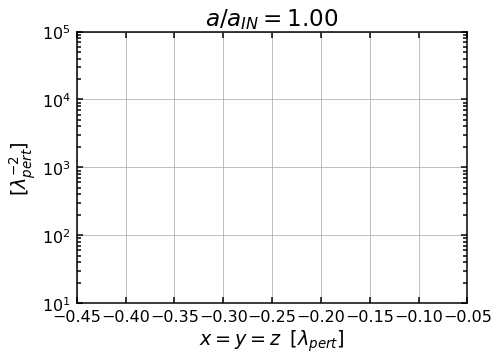

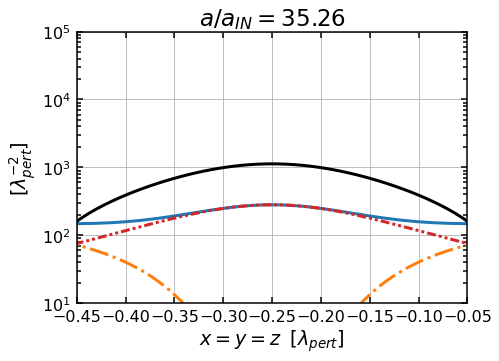

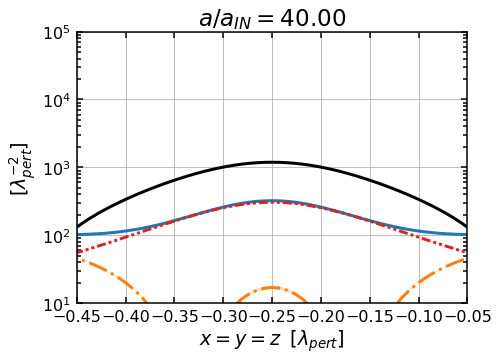

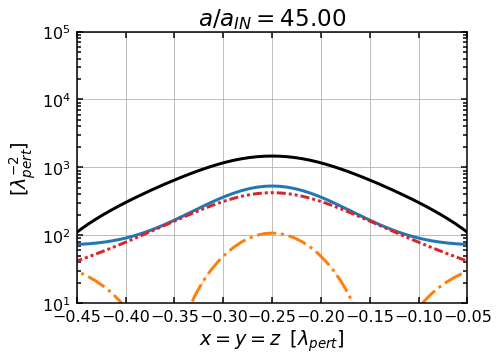

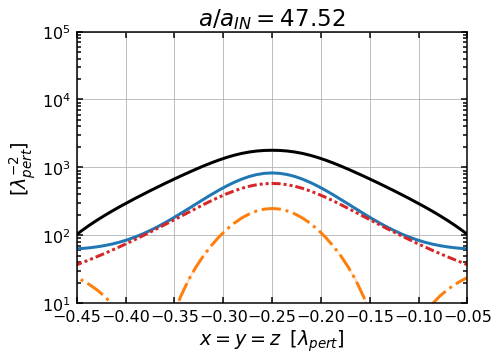

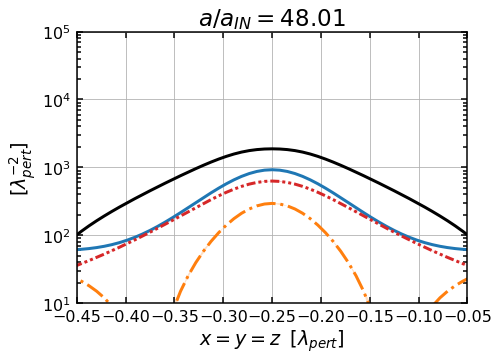

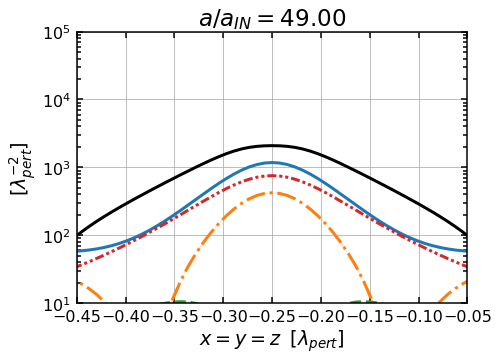

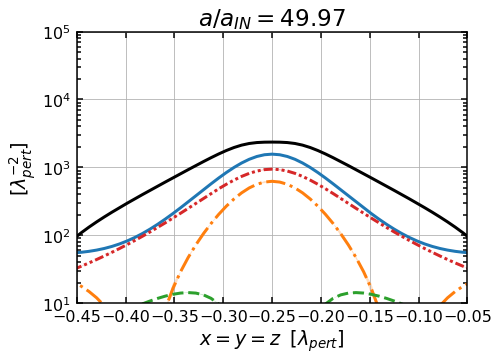

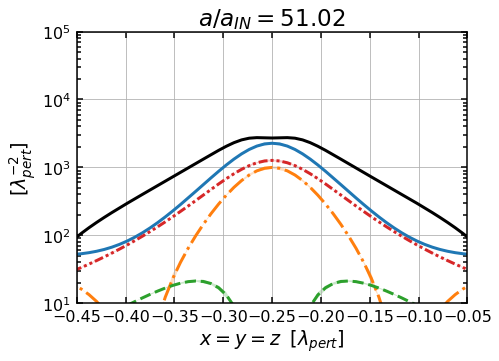

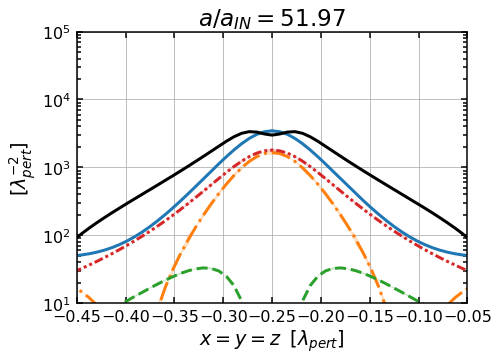

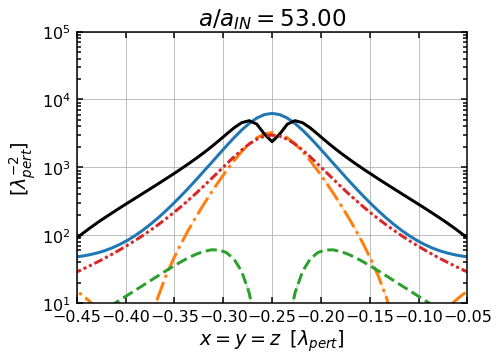

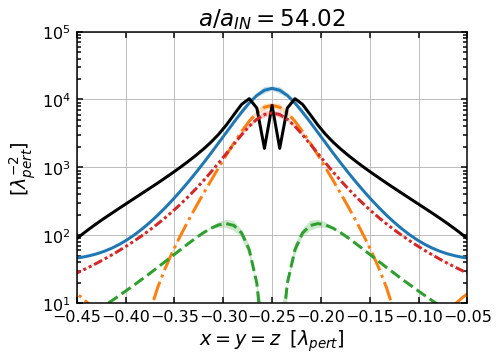

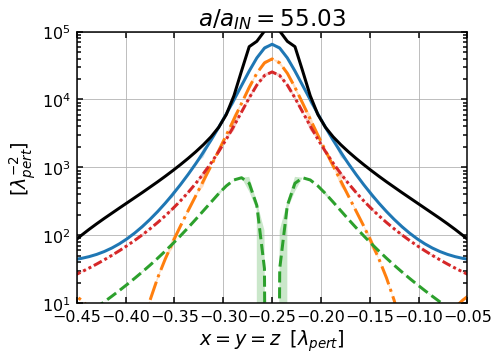

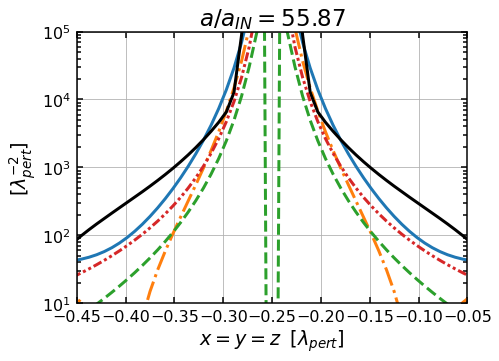

In [47]:
L = p128['Lx']
L2 = L*L
x = x128/(L*np.sqrt(3))
for it in range(14):
    plt.figure(figsize=(7,5))
    dtK128 = (((f128[it]['K']**2)/3) + (2*f128[it]['A2'])
              + (Lin128.evo.kappa*f128[it]['rho']/2) - Lin128.evo.Lambda)
    dtK64 = (((f64[it]['K']**2)/3) + (2*f64[it]['A2'])
             + (Lin64.evo.kappa*f64[it]['rho']/2) - Lin64.evo.Lambda)
    dtK32 = (((f32[it]['K']**2)/3) + (2*f32[it]['A2'])
             + (Lin32.evo.kappa*f32[it]['rho']/2) - Lin32.evo.Lambda)
    plt.semilogy(x, abs(dtK128)*L2, linestyle='-')
    plt.semilogy(x, abs((1/3)*f128[it]['K']**2)*L2, linestyle='-.')
    plt.semilogy(x, abs(f128[it]['RicciS'])*L2, 'k-')
    plt.semilogy(x, abs(2*f128[it]['A2'])*L2, linestyle='--')
    plt.semilogy(x, abs(Lin128.evo.kappa*f128[it]['rho']/2)*L2, linestyle=(0,(3,1,1,1,1,1)))
    plt.semilogy(x, [abs(Lin128.evo.Lambda)*L2]*len(x128), linestyle=':')

    err = get_error(abs(dtK32)*L2, abs(dtK64)*L2, abs(dtK128)*L2)
    plt.fill_between(x, abs(dtK128)*L2-err, 
                     abs(dtK128)*L2+err, alpha=0.25)
    err = get_error(abs((1/3)*f32[it]['K']**2)*L2, abs((1/3)*f64[it]['K']**2)*L2, abs((1/3)*f128[it]['K']**2)*L2)
    plt.fill_between(x, abs((1/3)*f128[it]['K']**2)*L2-err, abs((1/3)*f128[it]['K']**2)*L2+err, alpha=0.25)
    err = get_error(abs(2*f32[it]['A2'])*L2, abs(2*f64[it]['A2'])*L2, abs(2*f128[it]['A2'])*L2)
    plt.fill_between(x, abs(2*f128[it]['A2'])*L2-err, abs(2*f128[it]['A2'])*L2+err, alpha=0.25)
    err = get_error(abs(Lin32.evo.kappa*f32[it]['rho']/2)*L2, abs(Lin64.evo.kappa*f64[it]['rho']/2)*L2, abs(Lin128.evo.kappa*f128[it]['rho']/2)*L2)
    plt.fill_between(x, abs(Lin128.evo.kappa*f128[it]['rho']/2)*L2-err, abs(Lin128.evo.kappa*f128[it]['rho']/2)*L2+err, alpha=0.25)
    plt.title(r'$a/a_{IN}=$'+'{:.2f}'.format(var_all128[it]))
    plt.grid()
    plt.ylabel(r'$[\lambda_{pert}^{-2}]$')
    plt.xlabel(r'$x = y = z \;\;[\lambda_{pert}]$')
    #plt.ylim(L2*1e-11, L2*3e-4)
    plt.ylim(10, 100000)
    plt.xlim(-0.45, -0.05)